In [5]:

! pip install pandas-datareader
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

You should consider upgrading via the 'C:\Users\Mattia\list\Scripts\python.exe -m pip install --upgrade pip' command.


In [172]:
crypto = 'BTC'
against_courrency = 'EUR'
start = dt.datetime(2016,1,1)
# end = dt.datetime(2021,9,1)
end = dt.datetime.now()
data = web.DataReader(f'{crypto}-{against_courrency}','yahoo',start,end)

In [173]:
data


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-17,9316.917969,9240.340820,9253.401367,9246.486328,1.466026e+10,9246.486328
2019-09-18,9319.454102,8917.574219,9248.524414,9292.973633,1.804724e+10,9292.973633
2019-09-19,9334.069336,9194.604492,9292.886719,9239.483398,1.337076e+10,9239.483398
2019-09-20,9245.341797,9075.292969,9241.304688,9092.541992,1.218296e+10,9092.541992
2019-09-21,9142.628906,9004.768555,9096.534180,9138.951172,1.197878e+10,9138.951172
...,...,...,...,...,...,...
2021-10-26,52939.003906,50162.480469,52043.277344,50421.937500,3.763995e+10,50421.937500
2021-10-27,53186.023438,49810.277344,50411.882812,51892.304688,3.873988e+10,51892.304688
2021-10-28,54531.996094,51632.074219,51894.648438,53825.324219,3.188010e+10,53825.324219


In [192]:
training_data = data[data.index<'2021-05-01']
test_data = data[(data.index>='2021-05-01') & (data.index<'2021-09-01')]
last_60 = data[data.index>='2021-09-01']
print(last_60.shape)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_close = scaler.fit_transform(training_data['Close'].values.reshape(-1,1))

(60, 6)


In [193]:
prediction_days = 60
X_train, Y_train = [], []

for i in range(prediction_days, len(scaled_data_close)):
    X_train.append(scaled_data_close[i-prediction_days:i,0])
    Y_train.append(scaled_data_close[i,0])
    
X_train, Y_train = np.array(X_train), np.array(Y_train)
print(X_train)
print(X_train.shape)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train)
print(X_train.shape)




[[0.09865056 0.09960552 0.0985067  ... 0.07103823 0.06655629 0.06764871]
 [0.09960552 0.0985067  0.09548814 ... 0.06655629 0.06764871 0.06810807]
 [0.0985067  0.09548814 0.09644151 ... 0.06764871 0.06810807 0.0628682 ]
 ...
 [0.67560965 0.75489756 0.73107853 ... 0.82740595 0.84385357 0.83679037]
 [0.75489756 0.73107853 0.77052252 ... 0.84385357 0.83679037 0.81608932]
 [0.73107853 0.77052252 0.74229148 ... 0.83679037 0.81608932 0.89571402]]
(528, 60)
[[[0.09865056]
  [0.09960552]
  [0.0985067 ]
  ...
  [0.07103823]
  [0.06655629]
  [0.06764871]]

 [[0.09960552]
  [0.0985067 ]
  [0.09548814]
  ...
  [0.06655629]
  [0.06764871]
  [0.06810807]]

 [[0.0985067 ]
  [0.09548814]
  [0.09644151]
  ...
  [0.06764871]
  [0.06810807]
  [0.0628682 ]]

 ...

 [[0.67560965]
  [0.75489756]
  [0.73107853]
  ...
  [0.82740595]
  [0.84385357]
  [0.83679037]]

 [[0.75489756]
  [0.73107853]
  [0.77052252]
  ...
  [0.84385357]
  [0.83679037]
  [0.81608932]]

 [[0.73107853]
  [0.77052252]
  [0.74229148]
  ...

In [194]:
#Create RNN


In [195]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.summary()






Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_57 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
dropout_57 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_58 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_58 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_59 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_59 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)               

In [196]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,Y_train,epochs=30,batch_size=32)

Epoch 1/30
17/17 [==============================] - 6s 75ms/step - loss: 0.0380
Epoch 2/30
17/17 [==============================] - 1s 79ms/step - loss: 0.0054
Epoch 3/30
17/17 [==============================] - 1s 77ms/step - loss: 0.0050
Epoch 4/30
17/17 [==============================] - 1s 75ms/step - loss: 0.0045
Epoch 5/30
17/17 [==============================] - 1s 75ms/step - loss: 0.0041
Epoch 6/30
17/17 [==============================] - 1s 77ms/step - loss: 0.0036
Epoch 7/30
17/17 [==============================] - 1s 76ms/step - loss: 0.0039
Epoch 8/30
17/17 [==============================] - 1s 78ms/step - loss: 0.0034
Epoch 9/30
17/17 [==============================] - 1s 75ms/step - loss: 0.0038
Epoch 10/30
17/17 [==============================] - 1s 78ms/step - loss: 0.0038
Epoch 11/30
17/17 [==============================] - 1s 78ms/step - loss: 0.0027
Epoch 12/30
17/17 [==============================] - 1s 79ms/step - loss: 0.0035
Epoch 13/30
17/17 [==================

In [197]:
# start_test = dt.datetime(2021,9,3)

# end_test = dt.datetime.now()
# test_data = web.DataReader(f'{crypto}-{against_courrency}','yahoo',start_test,end_test)
test_data['Close'].values

array([47088.5703125 , 47432.76953125, 44387.26171875, 47823.05859375,
       46742.55859375, 47155.5078125 , 48345.46484375, 47846.5234375 ,
       46010.484375  , 46692.53125   , 40695.51171875, 41166.6953125 ,
       41072.77734375, 38498.73828125, 38235.890625  , 35814.0859375 ,
       35106.796875  , 30403.203125  , 33359.13671875, 30627.82226562,
       30818.25      , 28545.53710938, 31689.203125  , 31356.95117188,
       32229.53320312, 31524.04101562, 29278.3203125 , 28391.1640625 ,
       29269.51757812, 30519.30859375, 30026.79492188, 30775.01171875,
       32321.55078125, 30322.69921875, 29221.08007812, 29474.39257812,
       27526.4921875 , 27497.93359375, 30664.52734375, 30150.48828125,
       30832.0546875 , 29360.51367188, 32286.50585938, 33178.515625  ,
       33325.59375   , 31969.33398438, 31943.0625    , 30165.85546875,
       30019.2265625 , 30071.78125   , 26591.06445312, 27232.39648438,
       28266.57617188, 29059.703125  , 26502.84179688, 26965.50195312,
      

In [198]:
X_test, Y_test = [], []
actual_prices = test_data['Close'].values
total_dataset = pd.concat((training_data['Close'],test_data['Close']),axis=0)
# model_inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days:]
# print(model_inputs)
# model_inputs.reshape(-1,1)
print(model_inputs)
part_60_days = training_data.tail(60)
df= part_60_days.append(test_data, ignore_index = True)
df = df[['Close']]
last_60 = last_60[['Close']]
df.tail()
inputs = scaler.transform(df) 
last_scaled = scaler.transform(last_60)
X_test=[]
Y_test=[]
for i in range (prediction_days, len(inputs)):
    X_test.append(inputs[i-prediction_days:i]) 
    Y_test.append(inputs[i, 0])
    
X_test, Y_test = np.array(X_test), np.array(Y_test)
print(X_test, Y_test)
print(X_test.shape, Y_test.shape)
print(last_scaled.shape)
last_scaled = last_scaled.reshape((1,60,1))
print(last_scaled.shape)
Y_pred = model.predict(X_test) 
last_pred = model.predict(last_scaled)
# for i in range()

Date
2021-03-03    50538.242188
2021-03-04    48561.167969
2021-03-05    48927.304688
2021-03-06    48912.382812
2021-03-07    51206.691406
                  ...     
2021-10-26    58482.386719
2021-10-27    60622.136719
2021-10-28    62227.964844
2021-10-29    61888.832031
2021-10-31    60684.011719
Name: Close, Length: 243, dtype: float64
[[[0.77052252]
  [0.74229148]
  [0.75252153]
  ...
  [0.81608932]
  [0.89571402]
  [0.89700812]]

 [[0.74229148]
  [0.75252153]
  [0.75192154]
  ...
  [0.89571402]
  [0.89700812]
  [0.87602436]]

 [[0.75252153]
  [0.75192154]
  [0.79071972]
  ...
  [0.89700812]
  [0.87602436]
  [0.8830951 ]]

 ...

 [[0.49090952]
  [0.49559118]
  [0.50894879]
  ...
  [0.76309734]
  [0.76037585]
  [0.75888828]]

 [[0.49559118]
  [0.50894879]
  [0.5201347 ]
  ...
  [0.76037585]
  [0.75888828]
  [0.72811855]]

 [[0.50894879]
  [0.5201347 ]
  [0.49301758]
  ...
  [0.75888828]
  [0.72811855]
  [0.72912875]]] [0.87602436 0.8830951  0.82053253 0.89111264 0.86891639 0.87739

C:\Users\Mattia\list\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
C:\Users\Mattia\list\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [199]:
scale = 1/scaler.scale_[0]
Y_test_rescaled = Y_test*scale
Y_pred_rescaled = Y_pred*scale
last_pred_rescaled = last_pred*scale

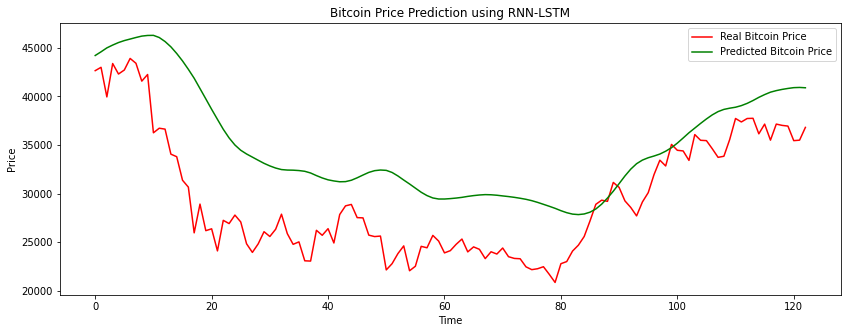

In [200]:
plt.figure(figsize=(14,5))
plt.plot(Y_test_rescaled, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred_rescaled, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# print(Y_test)
# print(Y_pred)

[[49613.01]]


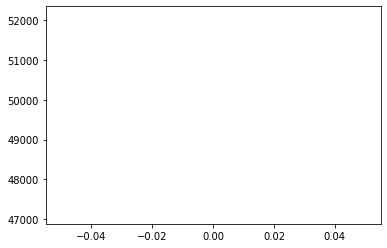

In [201]:
print(last_pred*scale) 
plt.plot(last_pred*scale)